### Image Data Preprocessing with a Validation Set

In [52]:
#importing libraries

import os
import random
from io import BytesIO
import numpy as np
from ipywidgets import widgets
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


In [9]:
train_dir = "horse-or-human"
valid_dir = "validation-horse-or-human"

train_horse_dir = os.path.join(train_dir, "horses")
train_human_dir = os.path.join(train_dir, "humans")

valid_horse_dir = os.path.join(valid_dir, "horses")
valid_human_dir = os.path.join(valid_dir, "humans")

train_horse_files = os.listdir(train_horse_dir)
train_human_files = os.listdir(train_human_dir)

valid_horse_files = os.listdir(valid_horse_dir)
valid_human_files = os.listdir(valid_human_dir)

print(f"Names of first 5 train horse files : {train_horse_files[:5]}")

print(f"Names of first 5 train human files : {train_human_files[:5]}")



Names of first 5 train horse files : ['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png']
Names of first 5 train human files : ['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png']


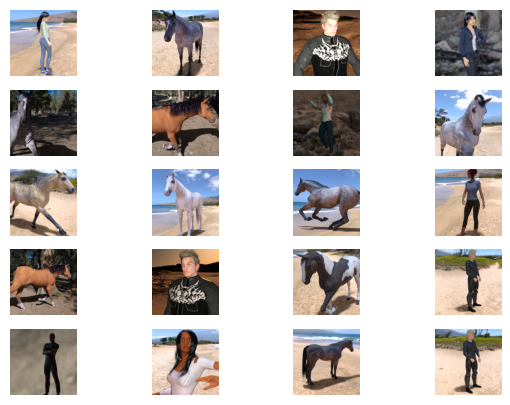

In [46]:
#visualization of sample images

plt.subplots(5,4, figsize=(7,5))

for i in range(20):
    plt.subplot(5,4,i+1)
    img_file = random.choice(train_horse_files + train_human_files)
    if "horse" in img_file :
        img_path = os.path.join(train_horse_dir, img_file)
    else:
        img_path = os.path.join(train_human_dir, img_file) 

    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis("off")       

In [12]:
#Model building

model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(300, 300, 3)),
        tf.keras.layers.Conv2D(16, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,393 (653.88 KB)

 Trainable params: 167,393 (653.88 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#model compiling

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
loss="binary_crossentropy",
metrics=['accuracy'])

In [19]:
#training dataset from directory

training_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(300, 300),
    batch_size = 32,
    label_mode ="binary"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    image_size=(300, 300),
    batch_size = 32,
    label_mode ="binary"
)

Found 1027 files belonging to 2 classes.


Found 256 files belonging to 2 classes.


In [30]:
#rescaling layer

rescaling_layer = tf.keras.layers.Rescaling(scale = 1./255)

# mapping with train and validation images
training_dataset_final = training_dataset.map(lambda image, label : (rescaling_layer(image), label))
validation_dataset_final = validation_dataset.map(lambda image, label : (rescaling_layer(image), label))

#adding caching, shuffle and prefetch properties for improving speed

training_dataset_final = (training_dataset_final
                        .cache()
                        .shuffle(1000)
                        .prefetch(tf.data.AUTOTUNE))

validation_dataset_final = (validation_dataset_final
                        .cache()
                        .prefetch(tf.data.AUTOTUNE))


In [31]:
history = model.fit(
    training_dataset_final,
    validation_data = validation_dataset_final,
    epochs = 20, 
    verbose =2
)

Epoch 1/20
33/33 - 8s - 240ms/step - accuracy: 0.7050 - loss: 0.6294 - val_accuracy: 0.8242 - val_loss: 0.5436
Epoch 2/20
33/33 - 5s - 164ms/step - accuracy: 0.8948 - loss: 0.2671 - val_accuracy: 0.8516 - val_loss: 0.5102
Epoch 3/20
33/33 - 6s - 174ms/step - accuracy: 0.9357 - loss: 0.2083 - val_accuracy: 0.8906 - val_loss: 0.4649
Epoch 4/20
33/33 - 6s - 175ms/step - accuracy: 0.9406 - loss: 0.1845 - val_accuracy: 0.8984 - val_loss: 0.5387
Epoch 5/20
33/33 - 6s - 174ms/step - accuracy: 0.9572 - loss: 0.1062 - val_accuracy: 0.8906 - val_loss: 0.5548
Epoch 6/20
33/33 - 6s - 174ms/step - accuracy: 0.9718 - loss: 0.0934 - val_accuracy: 0.9023 - val_loss: 0.6599
Epoch 7/20
33/33 - 6s - 174ms/step - accuracy: 0.9737 - loss: 0.0843 - val_accuracy: 0.8633 - val_loss: 0.8712
Epoch 8/20
33/33 - 5s - 156ms/step - accuracy: 0.9834 - loss: 0.0434 - val_accuracy: 0.8750 - val_loss: 0.9627
Epoch 9/20
33/33 - 5s - 148ms/step - accuracy: 0.9757 - loss: 0.0866 - val_accuracy: 0.8789 - val_loss: 0.8667
E

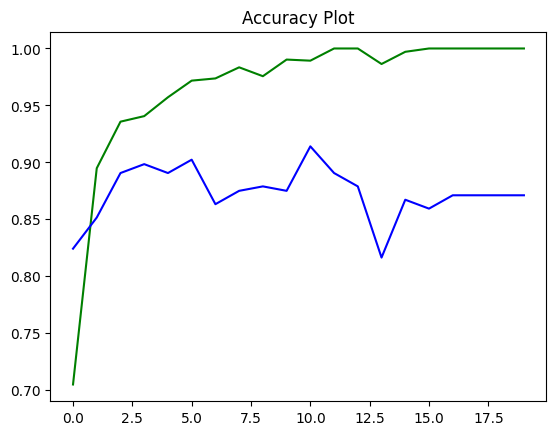

In [36]:
#plotting accuracy graph

epochs = range(len(history.history['accuracy']))
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'g', label = "training_accuracy")
plt.plot(epochs, val_accuracy, 'b', label = "validation_accuracy")
plt.title("Accuracy Plot")
plt.show()


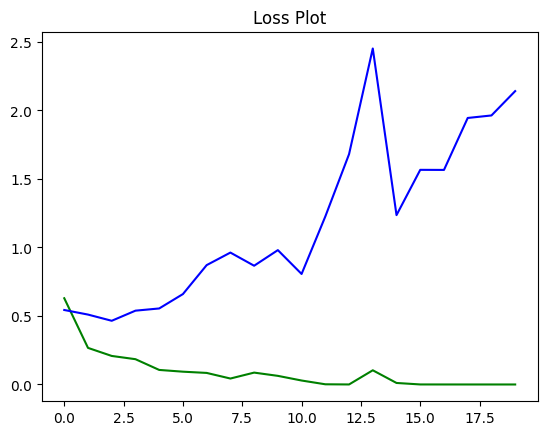

In [37]:
#plotting accuracy graph

epochs = range(len(history.history['loss']))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'g', label = "training_loss")
plt.plot(epochs, val_loss, 'b', label = "validation_loss")
plt.title("Loss Plot")
plt.show()

In [64]:
#Model Prediction

#creating upload widget
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

#function to predict class of file
def file_predict(filename, file, out):

    img = tf.keras.utils.load_img(file, target_size=(300, 300))
    img = tf.keras.utils.img_to_array(img)
    img = rescaling_layer(img)
    img = np.expand_dims(img, axis=0)
    prediction=model.predict(img, verbose=False)[0][0]

    with out:
        if prediction > 0.5:
            print(f"{filename} is a human")
        else:
            print(f"{filename} is a horse")

# After uploading, access the file 
def on_upload_change(change): 
    items = change.new

    for item in items:
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

# Trigger display when file is uploaded 
uploader.observe(on_upload_change, names='value')      



FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()